# Understanding Customer Churn: An Exploratory Data Analysis to Identify High-Risk Customer Profiles in Telecom

### Project Overview
This project focuses on examining telecom data to uncover patterns and trends associated with customer churn. Through detailed exploratory data analysis, we identify profiles of customers most likely to churn, offering valuable insights into their behaviour, preferences, and pain points. These findings enable telecom companies to develop targeted retention strategies, tailor their service offerings, and ultimately reduce churn rates, ensuring a more loyal and satisfied customer base.

This data set by "Maven Analytics" is for a fictional telecommunications company that provides phone and internet services to 7,043 customers in California, and includes details about customer demographics, location, services, and current status.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Extraction

In [3]:
# import data set from a csv file
df_telecom = pd.read_csv('C:/Users/jake/Desktop/python_data_analytics/telecom_customer_churn.csv')

In [4]:
# first 5 rows in the dataframe
df_telecom.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
# number of rows and columns
df_telecom.shape

(7043, 38)

### Data Cleaning

#### data type

In [6]:
# data type of all attributes: all correct
df_telecom.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

#### irrelevant data

In [6]:
# drop columns: 4 attributes not relevant in this analysis are dropped
df_telecom.drop(columns=['Customer ID', 'Zip Code', 'Latitude', 'Longitude'], axis=1, inplace=True)

#### missing values

In [8]:
# count missing values for each column
df_telecom.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                 

In [9]:
# non-null count and data type of columns
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  6361 non-null   float64
 10  Multiple Lines                     6361 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [ ]:
# 14 columns have missing values. 2 numeric and 12 category columns.

# fill missing values in category columns with the exception of "Churn Category" and "Churn Reason". /n
# ...these columns have nulls for every entry with Stayed or Joined (Not Churned) in the "Customer Status" column.
# missing values in numeric columns "Avg Monthly Long Distance Charges" and "Avg Monthly GB Download" are ignorable.

In [10]:
# list category columns
category_columns = df_telecom.select_dtypes(include='object').columns.tolist()

# fill missing values for category columns
for column in category_columns:
    if column in ['Churn Category', 'Churn Reason']:   # null values here belong to rows for customers who stayed or joined
        pass
    else:
        df_telecom[column].fillna('Not Specified', inplace=True)

In [11]:
# confirm missing values in category columns are filled
df_telecom.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download              1526
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                 

#### duplicates

In [12]:
# count duplicate entries: no duplicates
df_telecom.duplicated().sum()

0

#### structural errors

In [13]:
# print 'unique values' and 'unique values count' for each category attribute to verify uniqueness
category_columns = df_telecom.select_dtypes(include='object').columns.tolist() # create category columns list

for column in category_columns:
    print(column)
    print(df_telecom[column].unique())
    print(df_telecom[column].nunique())
    print()

Gender
['Female' 'Male']
2

Married
['Yes' 'No']
2

City
['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
1106

Offer
['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
6

Phone Service
['Yes' 'No']
2

Multiple Lines
['No' 'Yes' 'Not Specified']
3

Internet Service
['Yes' 'No']
2

Internet Type
['Cable' 'Fiber Optic' 'DSL' 'Not Specified']
4

Online Security
['No' 'Yes' 'Not Specified']
3

Online Backup
['Yes' 'No' 'Not Specified']
3

Device Protection Plan
['No' 'Yes' 'Not Specified']
3

Premium Tech Support
['Yes' 'No' 'Not Specified']
3

Streaming TV
['Yes' 'No' 'Not Specified']
3

Streaming Movies
['No' 'Yes' 'Not Specified']
3

Streaming Music
['No' 'Yes' 'Not Specified']
3

Unlimited Data
['Yes' 'No' 'Not Specified']
3

Contract
['One Year' 'Month-to-Month' 'Two Year']
3

Paperless Billing
['Yes' 'No']
2

Payment Method
['Credit Card' 'Bank Withdrawal' 'Mailed Check']
3

Customer Status
['Stayed' 'Churned' 'Joined']
3

Churn Category
[

In [ ]:
# values in all category columns are unique and correctly formatted - no structural errors

In [14]:
# rename column "Churn Category" to "Churn Reason Category" since the latter is more intuitive
df_telecom.rename(columns={'Churn Category': 'Churn Reason Category'}, inplace=True)
df_telecom.head(3)

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Reason Category,Churn Reason
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices


In [15]:
# update category column names list
category_columns = df_telecom.select_dtypes(include='object').columns.tolist()

#### invalid data

In [16]:
# list numeric columns
numeric_columns = df_telecom.select_dtypes(include=['float','int']).columns.tolist()

# filter for numeric columns with negative values
neg_value_columns = (df_telecom[numeric_columns]<0).any(axis=0)
neg_value_columns

Age                                  False
Number of Dependents                 False
Number of Referrals                  False
Tenure in Months                     False
Avg Monthly Long Distance Charges    False
Avg Monthly GB Download              False
Monthly Charge                        True
Total Charges                        False
Total Refunds                        False
Total Extra Data Charges             False
Total Long Distance Charges          False
Total Revenue                        False
dtype: bool

In [ ]:
# "Monthly Charge" contains negative values. This is justifiable for at least, one of the following reasons or some other:

# 1. Refunds due to billing errors, service disruptions, overpayments, or customer complaints
# 2. Promotional adjustments or discounts
# 3. Service cancellations

#### outliers

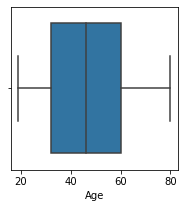

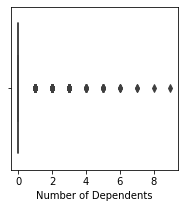

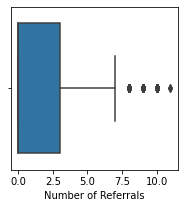

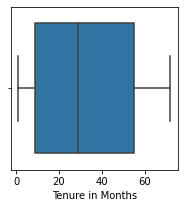

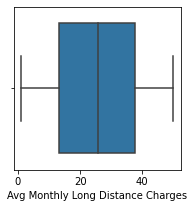

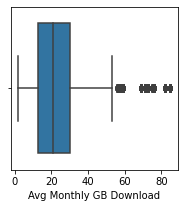

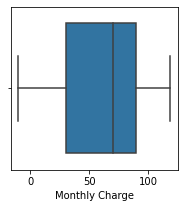

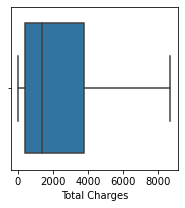

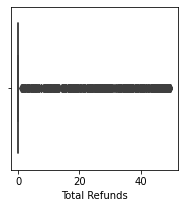

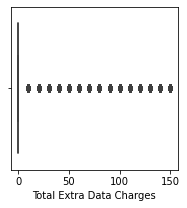

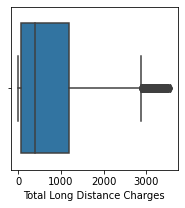

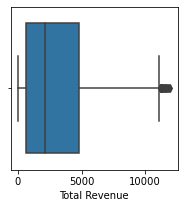

In [17]:
# check for outliers in numeric columns
for column in numeric_columns:
    plt.show()
    plt.figure(figsize=(3,3))
    sns.boxplot(data=df_telecom, x=column)
    

In [ ]:
# some numeric columns have outliers which are acceptable:

# Number of Dependents
# Number of Referrals
# Avg Monthly GB Download
# Total Refunds
# Total Extra Data Charges
# Total Long Distance Charges
# Total Revenue

### Data Exploration

#### 1. How many customers joined the company during the last quarter? How many stayed or left?

In [287]:
# customer count by customer status
df_telecom['Customer Status'].value_counts(ascending=False)

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [826]:
# export data: customer count by customer status
# df_telecom['Customer Status'].value_counts(ascending=False).to_csv('C:/Users/jake/Desktop/telecom customer churn analysis/customer count by customer status.csv')

In [19]:
# percent distribution of customer count by customer status
df_telecom['Customer Status'].value_counts(ascending=False, normalize=True) * 100

Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: Customer Status, dtype: float64

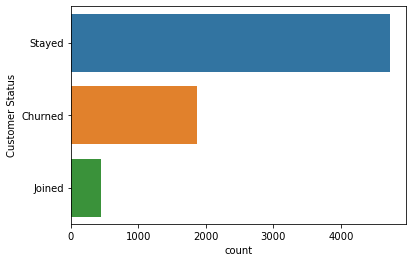

In [20]:
# customer status visual representation
order = df_telecom['Customer Status'].value_counts(ascending=False).index.tolist()
sns.countplot(data=df_telecom, y='Customer Status', order=order)
plt.show()

In [407]:
# top 5 cities by customer count
df_telecom['City'].value_counts().head()

Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Name: City, dtype: int64

In [936]:
# bottom 5 cities by customer count
df_telecom['City'].value_counts(ascending=True).head()

Johannesburg        2
Holtville           2
Eldridge            2
Jacumba             2
South Lake Tahoe    2
Name: City, dtype: int64

In [827]:
# export data: customer count by city
# df_telecom['City'].value_counts().head().to_csv('C:/Users/jake/Desktop/telecom customer churn analysis/customer count by city.csv')

In [318]:
# number of unique cities covered
df_telecom['City'].nunique()

1106

#### 2. What is the customer profile for a customer that churned, joined or stayed? Are they different?

In [ ]:
# CATEGORY ATTRIBUTES

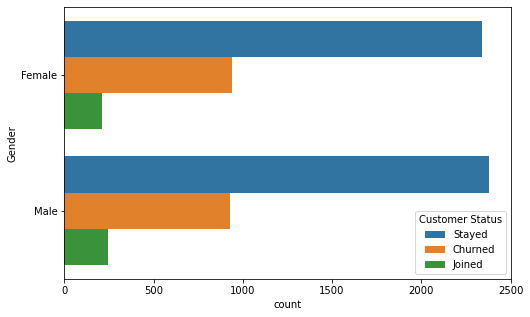

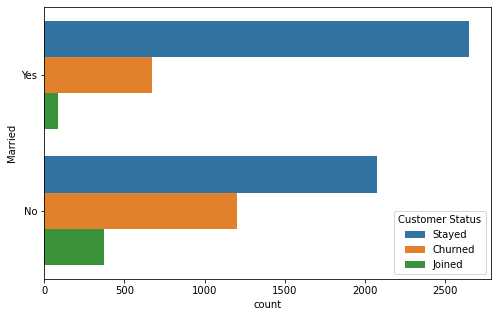

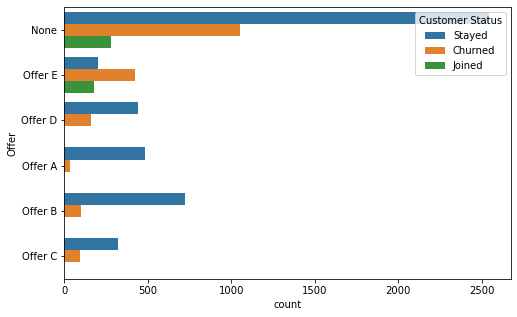

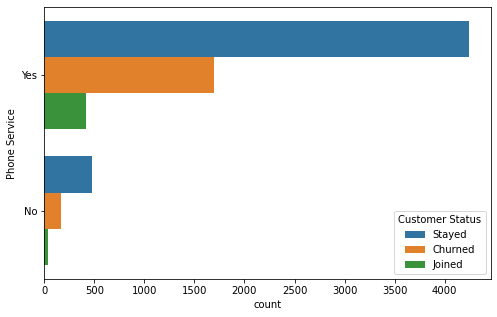

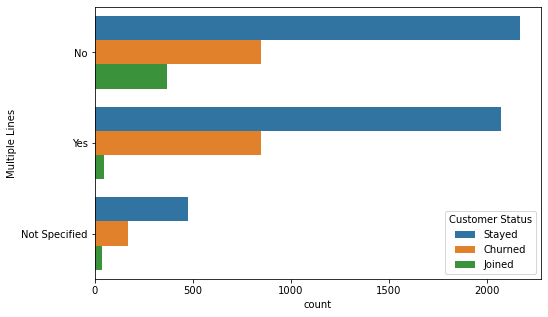

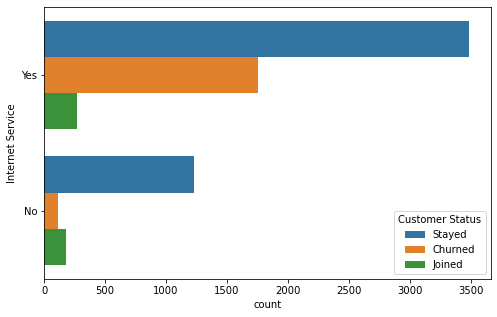

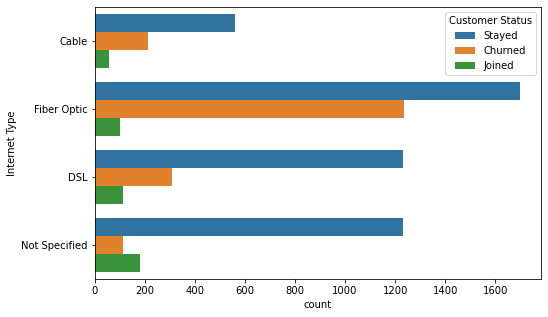

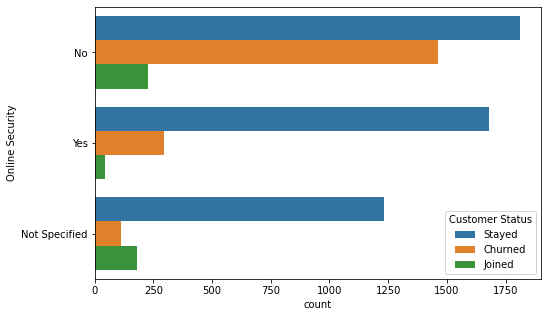

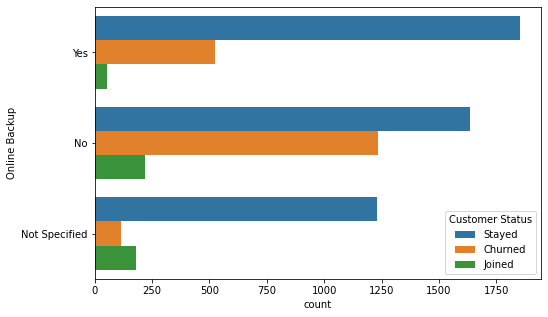

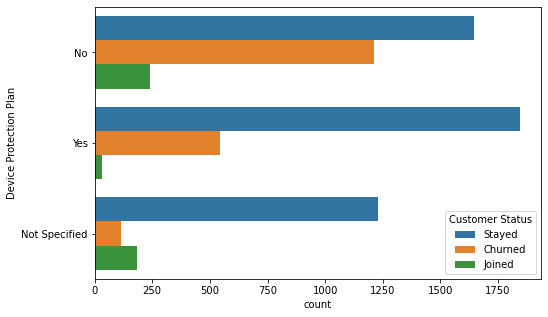

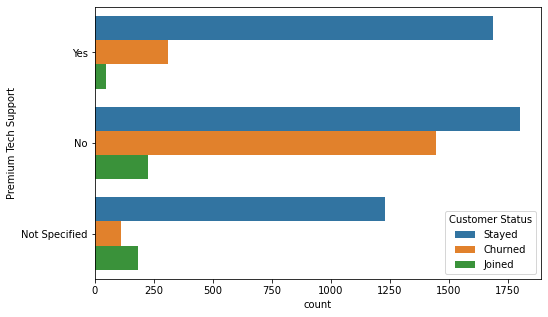

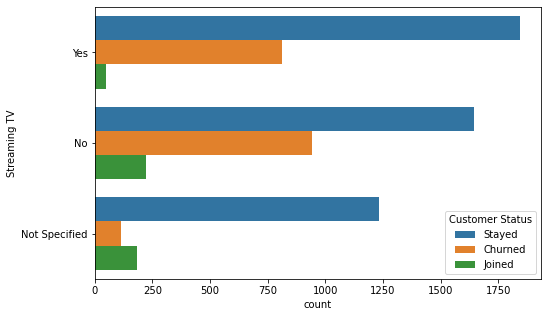

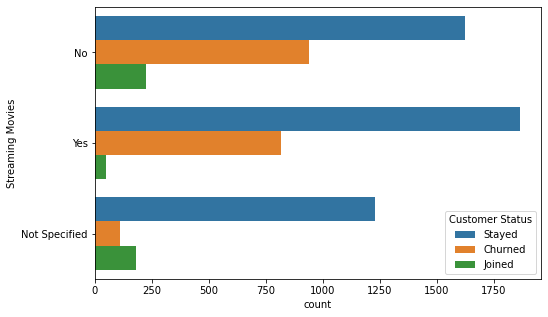

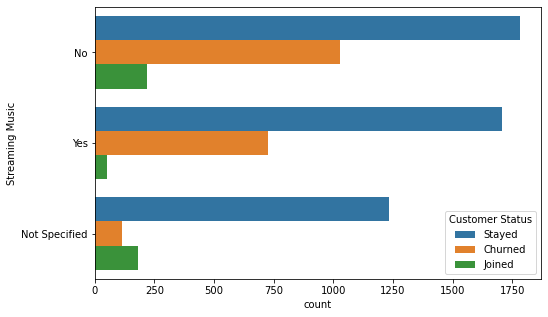

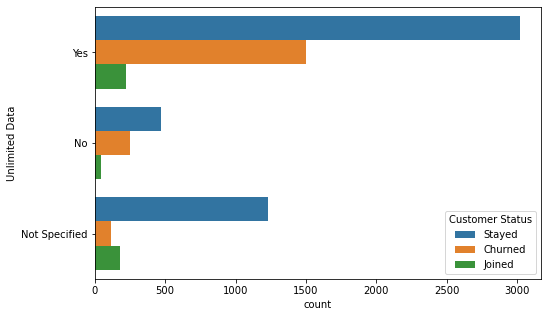

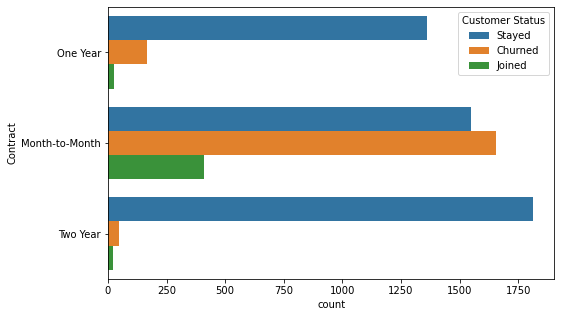

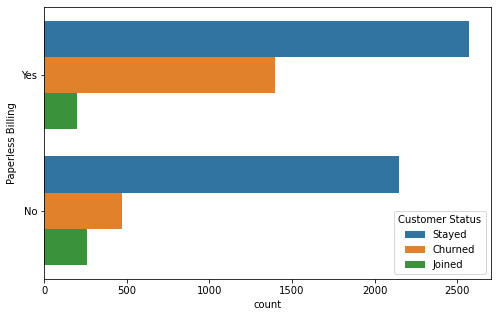

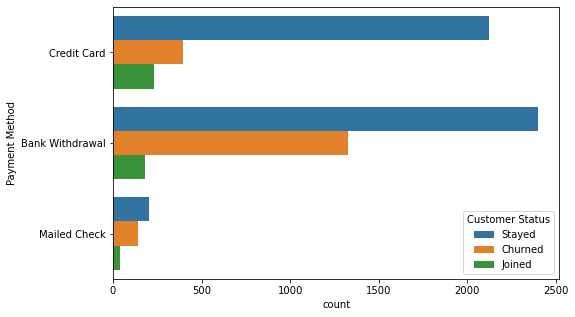

In [183]:
# count plot for category attributes by "Customer Status" to check customer profiles for the 3 categories
for column in category_columns:
    if column in ['Customer Status', 'Churn Reason Category', 'Churn Reason', 'City']:
        pass
    else:
        plt.figure(figsize=(8,5))
        sns.countplot(data=df_telecom, y=column, hue='Customer Status')
        plt.show()
        

In [658]:
# function to calculate churn percentages for every unique category column value
def churn_percentage(df, group_col, target_col):
    # group by the specified column and calculate the size and churn count
    group_counts = df.groupby(group_col).size()
    churn_counts = df[df[target_col] == 'Churned'].groupby(group_col).size()
    
    # calculate the churn percentage
    churn_percentage = (churn_counts / group_counts) * 100
    
    return churn_percentage

In [694]:
# apply function (churn_percentage) on selected category columns to calculate churn percentages for unique values
for column in category_columns:
    if column in ['Customer Status', 'Churn Reason Category', 'Churn Reason', 'City']:
        pass
    else:
        print(churn_percentage(df=df_telecom, group_col=column, target_col='Customer Status'))
        print()
    

Gender
Female    26.920872
Male      26.160338
dtype: float64

Married
No     32.957979
Yes    19.664903
dtype: float64

Offer
None       27.108589
Offer A     6.730769
Offer B    12.257282
Offer C    22.891566
Offer D    26.744186
Offer E    52.919255
dtype: float64

Phone Service
No     24.926686
Yes    26.709637
dtype: float64

Multiple Lines
No               25.044248
Not Specified    24.926686
Yes              28.609896
dtype: float64

Internet Service
No      7.404980
Yes    31.828893
dtype: float64

Internet Type
Cable            25.662651
DSL              18.583535
Fiber Optic      40.724876
Not Specified     7.404980
dtype: float64

Online Security
No               41.766724
Not Specified     7.404980
Yes              14.611194
dtype: float64

Online Backup
No               39.928756
Not Specified     7.404980
Yes              21.531494
dtype: float64

Device Protection Plan
No               39.127625
Not Specified     7.404980
Yes              22.502064
dtype: float64

Premiu

In [ ]:
# customer profiles are significantly different for customers that churned, stayed, or joined.

In [ ]:
# category attribute values with CHURN RATES of 40% and above:

# Offer - Offer E (53%)
# Contract - Month-to-Month (46%)
# Online Security - No (42%)
# Premium Tech Support - No (42%)
# Internet Type - Fibre Optic (41%)
# Online Backup - No (40%)
# Device Protection Plan - No (40%)

In [406]:
# top 10 impacted (churned) cities
df_telecom.loc[df_telecom['Customer Status']=='Churned', ['City']].value_counts().head(10)

City         
San Diego        185
Los Angeles       78
San Francisco     31
San Jose          29
Fallbrook         26
Sacramento        26
Temecula          22
Escondido         16
Long Beach        15
Oakland           13
dtype: int64

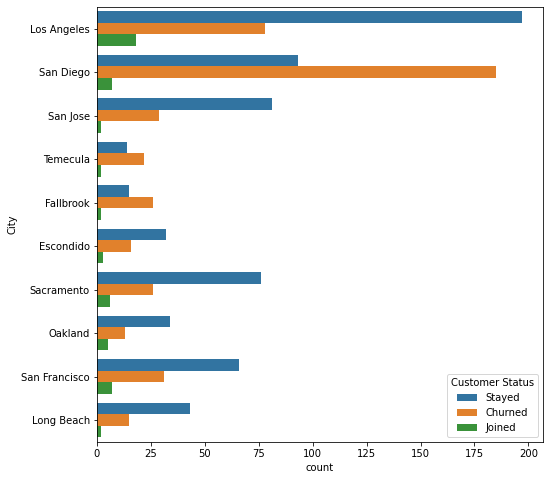

In [379]:
# nature of churn for the top 10 impacted cities
for column in category_columns:
    if column=='City':
        plt.figure(figsize=(8,8))
        sns.countplot(data=df_telecom[df_telecom['City'].isin(['San Diego', 'Los Angeles', 'San Francisco', 'San Jose', 'Fallbrook', 'Sacramento', 'Temecula', 'Escondido', 'Long Beach', 'Oakland'])], y=column, hue='Customer Status')
        plt.show()

In [878]:
# apply function (churn_percentage) on the top 10 impacted cities to get actual churned percentage for each city
churn_percentage(df=df_telecom.loc[df_telecom['City'].isin(['San Diego', 'Los Angeles', 'San Francisco', 'San Jose', 'Fallbrook', 'Sacramento', 'Temecula', 'Escondido', 'Long Beach', 'Oakland'])], group_col='City', target_col='Customer Status').sort_values(ascending=False)

City
San Diego        64.912281
Fallbrook        60.465116
Temecula         57.894737
Escondido        31.372549
San Francisco    29.807692
Los Angeles      26.621160
San Jose         25.892857
Long Beach       25.000000
Oakland          25.000000
Sacramento       24.074074
dtype: float64

In [ ]:
# top 3 churn cities amongst the top 10 most impacted:

# San Diego (65%)
# Fallbrook (60%)
# Temecula (58%)

In [ ]:
# NUMERIC ATTRIBUTES

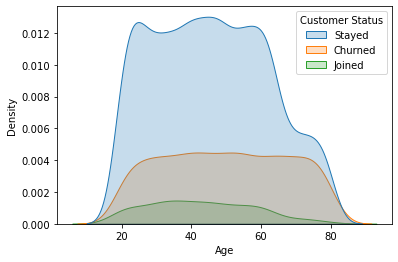

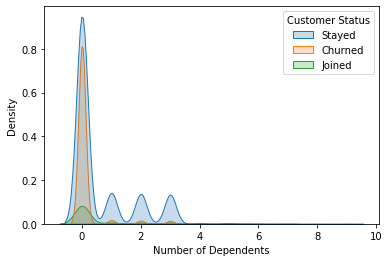

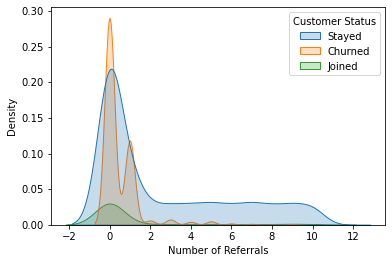

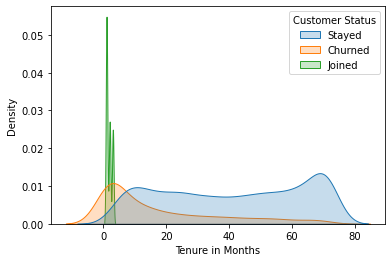

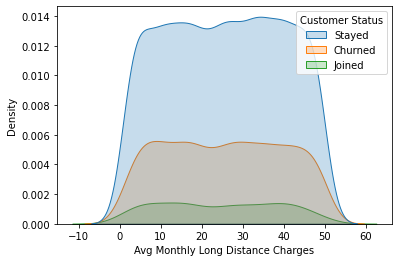

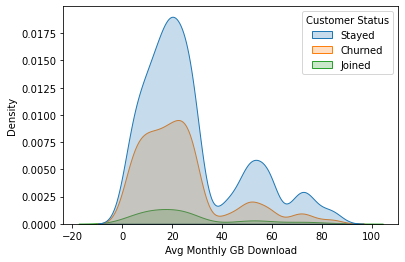

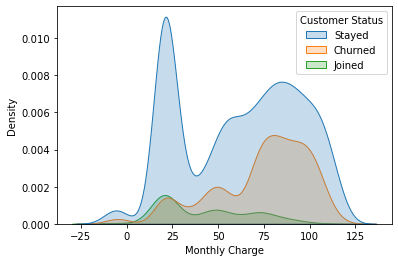

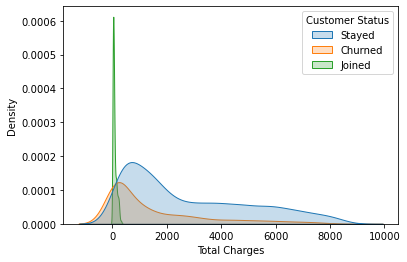

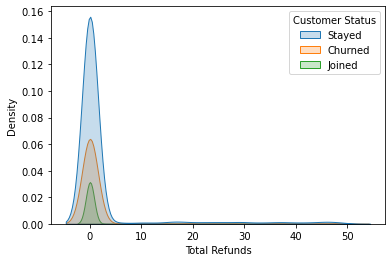

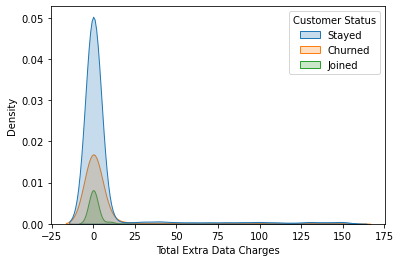

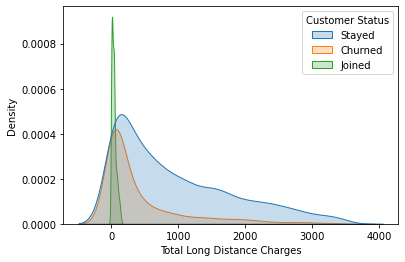

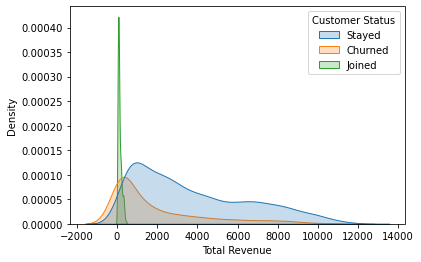

In [23]:
# kde plot for numeric attributes by "Customer Status" to check customer profiles for the 3 categories
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df_telecom, x=column, hue='Customer Status', fill=True)
    plt.show()
    

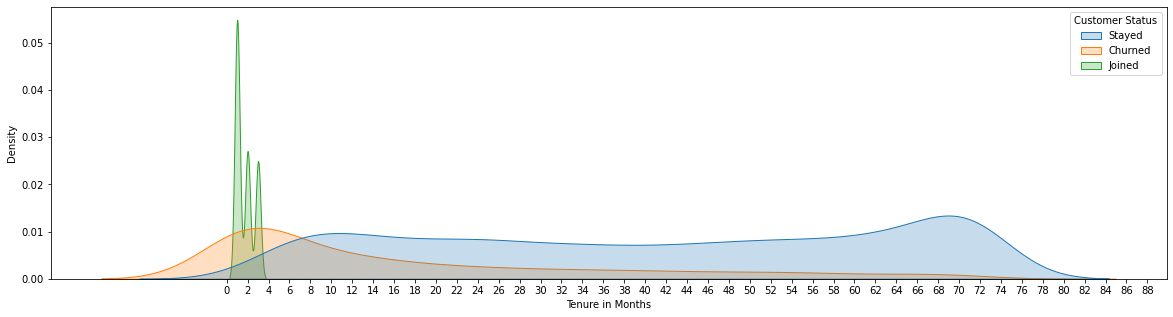

In [392]:
# explore "Customer Status" by "Tenure in Months" exclusively to have better view
plt.figure(figsize=(20,5))
plt.xticks(ticks=[i for i in range(0, 90, 2)])
sns.kdeplot(data=df_telecom, x='Tenure in Months', hue='Customer Status', fill=True)
plt.show()

In [ ]:
# numeric attributes with high churn:

# Age > 60 years
# Tenure in Months < 6 months

In [ ]:
# create a new column "Age_group" to explore "Age" distribution more deeply

In [24]:
# minimum and maximum "Age" values
print(df_telecom['Age'].min())
print(df_telecom['Age'].max())

19
80


In [25]:
# labels and bins to create new column to group "Ages"
labels = ['{0} - {1}'.format(i, i+9) for i in range(10, 81, 10)]
bins = range(10, 91, 10)

# new column to group ages
df_telecom['Age_group'] = pd.cut(x=df_telecom['Age'], bins=bins, labels=labels, right=False)

In [395]:
# percentage age distribution of customers in groups
df_telecom['Age_group'].value_counts(normalize=True).sort_index() * 100

10 - 19     1.803209
20 - 29    18.088883
30 - 39    17.975295
40 - 49    19.054380
50 - 59    17.776516
60 - 69    14.255289
70 - 79    10.109328
80 - 89     0.937101
Name: Age_group, dtype: float64

In [394]:
# percentage age distribution of churned customers in groups
df_telecom.loc[df_telecom['Customer Status']=='Churned', ['Age_group']].value_counts(normalize=True).sort_index() * 100

Age_group
10 - 19       0.963082
20 - 29      15.302301
30 - 39      16.532905
40 - 49      17.014446
50 - 59      16.425896
60 - 69      16.425896
70 - 79      15.783842
80 - 89       1.551632
dtype: float64

In [ ]:
# Age 60 years and above contribute more to churn ratio

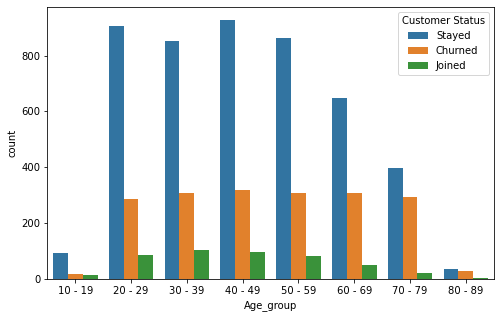

In [27]:
# count plot of "Age_group" by "Customer Status"
plt.figure(figsize=(8,5))
sns.countplot(data=df_telecom, x='Age_group', hue='Customer Status')
plt.show()

#### 3. What seem to be the key drivers of customer churn?

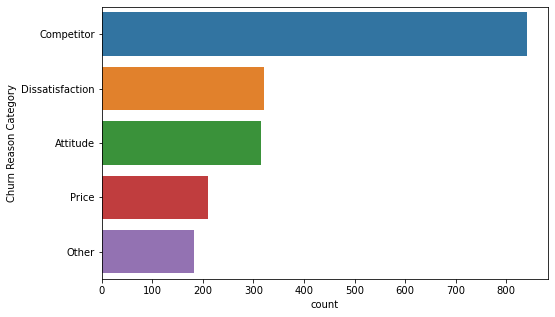

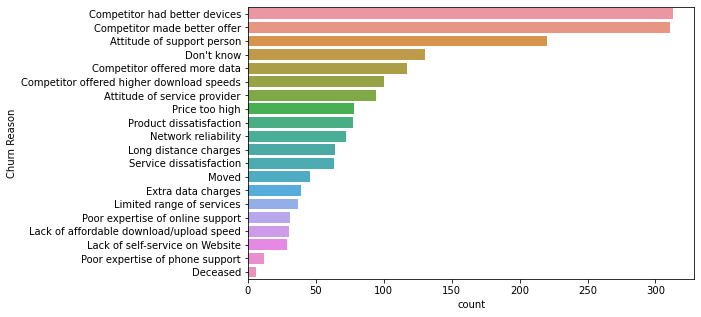

In [28]:
# count plot for churn reasons
for column in category_columns:
    if column in ['Churn Reason Category', 'Churn Reason']:
        order = df_telecom[column].value_counts(ascending=False).index # order bars in chart base on value counts
        plt.figure(figsize=(8,5))
        sns.countplot(data=df_telecom, y=column, order=order)
        plt.show()

In [410]:
# top 3 churn reasons
df_telecom['Churn Reason'].value_counts().head(3)

Competitor had better devices    313
Competitor made better offer     311
Attitude of support person       220
Name: Churn Reason, dtype: int64

#### 4. Is the company losing high value customers? If so, how can they retain them?

In [959]:
# create quantile labels
quantile_labels = ['Q4', 'Q3', 'Q2', 'Q1']

# assign quantile labels to a new column
df_telecom['Revenue Quantiles'] = pd.qcut(df_telecom['Total Revenue'], q=4, labels=quantile_labels)

# count and percentage distribution of churned customers by "Revenue Quantiles"
print(df_telecom.loc[df_telecom['Customer Status']=='Churned', ['Revenue Quantiles']].value_counts())
print(df_telecom.loc[df_telecom['Customer Status']=='Churned', ['Revenue Quantiles']].value_counts(normalize=True) * 100)

Revenue Quantiles
Q4                   803
Q3                   476
Q2                   329
Q1                   261
dtype: int64
Revenue Quantiles
Q4                   42.964152
Q3                   25.468165
Q2                   17.602996
Q1                   13.964687
dtype: float64


In [961]:
# count and percentage distribution of stayed customers by "Revenue Quantiles"
print(df_telecom.loc[df_telecom['Customer Status']=='Stayed', ['Revenue Quantiles']].value_counts())
print(df_telecom.loc[df_telecom['Customer Status']=='Stayed', ['Revenue Quantiles']].value_counts(normalize=True) * 100)

Revenue Quantiles
Q1                   1500
Q2                   1431
Q3                   1285
Q4                    504
dtype: int64
Revenue Quantiles
Q1                   31.779661
Q2                   30.317797
Q3                   27.224576
Q4                   10.677966
dtype: float64


In [966]:
# count and percentage distribution of joined customers by "Revenue Quantiles"
print(df_telecom.loc[df_telecom['Customer Status']=='Joined', ['Revenue Quantiles']].value_counts())
print(df_telecom.loc[df_telecom['Customer Status']=='Joined', ['Revenue Quantiles']].value_counts(normalize=True) * 100)

Revenue Quantiles
Q4                   454
Q3                     0
Q2                     0
Q1                     0
dtype: int64
Revenue Quantiles
Q4                   100.0
Q3                     0.0
Q2                     0.0
Q1                     0.0
dtype: float64


In [ ]:
# the company is losing high value customers:

# higher value customers churned the most
# lower value customers stayed the most

### Recommendations

To retain high value customers:

1. Revise promotional offers (Offer E) and contract (Month-to-Month) benefits
2. Provide customer service training for support staff
3. Improve internet services
4. Provide more customer support
5. Research about competitor's devices and offers

In [963]:
# export final data:
# df_telecom.to_csv('C:/Users/jake/Desktop/telecom customer churn analysis/telecom data transformed.csv', index=False)